In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./Data/satisfaction.xlsx')

In [3]:
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
df.columns = ['ID', 'Satisfaction', 'Gender', 'Customer_type', 'Age',
       'Type_of_travel', 'Class', 'Flight_distance', 'Seat_comfort',
       'Departure_arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_online_booking', 'Onboard_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_delay_in_minutes', 'Arrival_delay_in_minutes']

In [6]:
df['Satisfaction'] = df['Satisfaction'].apply(lambda value: 1 
if value == 'satisfied' else 0)

In [7]:
df['Gender'] = df['Gender'].apply(lambda value: 1 
if value == 'Female' else 0)

In [8]:
df['Customer_type'] = df['Customer_type'].apply(lambda value: 1 
if value == 'Loyal Customer' else 0)

In [9]:
df['Type_of_travel'] = df['Type_of_travel'].apply(lambda value: 1 
if value == 'Business travel' else 0)

In [10]:
df['Class'] = df['Type_of_travel'].apply(lambda value: 0 
if value == 'Eco' else 1
if value == 'Eco Plus' else 2)

In [11]:
df.dtypes

ID                                     int64
Satisfaction                           int64
Gender                                 int64
Customer_type                          int64
Age                                    int64
Type_of_travel                         int64
Class                                  int64
Flight_distance                        int64
Seat_comfort                           int64
Departure_arrival_time_convenient      int64
Food_and_drink                         int64
Gate_location                          int64
Inflight_wifi_service                  int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_online_booking                 int64
Onboard_service                        int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Departure_

In [12]:
df = df.drop(['ID'], axis = 1)

In [13]:
df

,Satisfaction,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Seat_comfort,Departure_arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_online_booking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_delay_in_minutes,Arrival_delay_in_minutes
0,1,1,1,65,0,2,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,1,47,0,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,1,15,0,2,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,1,60,0,2,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,1,70,0,2,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,0,29,0,2,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,0,0,63,0,2,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,0,0,69,0,2,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,0,0,66,0,2,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [14]:
df[df.Arrival_delay_in_minutes.isna() == True]

,Satisfaction,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Seat_comfort,Departure_arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_online_booking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_delay_in_minutes,Arrival_delay_in_minutes
145,1,1,1,21,0,2,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,1,0,1,28,0,2,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,1,0,1,28,0,2,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN
736,1,0,1,9,0,2,1862,0,5,0,...,3,3,5,3,4,4,4,3,0,NaN
818,0,0,1,9,0,2,1668,1,0,1,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,1,0,1,44,1,2,3431,2,2,3,...,4,5,5,5,5,5,5,4,70,NaN
128131,1,0,1,39,1,2,1595,4,4,4,...,5,5,5,5,5,3,5,5,0,NaN
128710,1,1,1,45,1,2,871,5,1,1,...,2,5,5,5,5,1,5,5,100,NaN
129774,1,0,0,49,0,2,1594,5,4,5,...,3,3,1,4,3,3,4,3,0,NaN


In [15]:
df.Arrival_delay_in_minutes = df.Arrival_delay_in_minutes.fillna(0)

In [16]:
X = df.iloc[:,1:]
y = np.array(df['Satisfaction'])

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
lr = accuracy_score(y_test, model_lr_prediction)
lr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7789113027409917

In [18]:
# K-Fold Logistic Regression
lr_plot = cross_val_score(LogisticRegression(), X, y, cv=7)
print('Maximum: ', lr_plot.max())
print('Mean: ', lr_plot.mean())
#lr_plot = pd.Series(lr_plot)
#lr_plot.plot()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [19]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.5518492796383325

In [20]:
# Decision Tree
model_dt = DecisionTreeClassifier().fit(X_train, y_train)
y_predict = model_dt.predict(X_test)
dt = accuracy_score(y_test, y_predict)
dt

0.9390591315060055

In [21]:
kappa_dt = cohen_kappa_score(y_test, y_predict)
kappa_dt

0.8771134216121014

In [22]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
knn = accuracy_score(y_test, model_knn_prediction)
knn

0.7070372651678473

In [23]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.41204415205260003

In [24]:
# # SVM
# model_svm = SVC(kernel='linear').fit(X_train, y_train)
# model_svm_prediction = model_svm.predict(X_test)
# svm = accuracy_score(y_test, model_svm_prediction)
# svm

In [25]:
# kappa_svm = cohen_kappa_score(y_test, model_svm_prediction)
# kappa_svm

In [26]:
# model_svm2 = SVC(kernel='poly').fit(X_train, y_train)
# model_svm_prediction2 = model_svm2.predict(X_test)
# svm2 = accuracy_score(y_test, model_svm_prediction2)
# svm2

In [27]:
# kappa_svm2 = cohen_kappa_score(y_test, model_svm_prediction2)
# kappa_svm2

In [28]:
# model_svm3 = SVC(kernel='rbf').fit(X_train, y_train)
# model_svm_prediction3 = model_svm3.predict(X_test)
# svm3 = accuracy_score(y_test, model_svm_prediction3)
# svm3

In [29]:
# kappa_svm3 = cohen_kappa_score(y_test, model_svm_prediction3)
# kappa_svm3

In [30]:
# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=50, criterion = 'entropy', random_state = 5).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
rf = accuracy_score(y_test, model_rf_prediction)
print('Accuracy Score: ', rf)

Accuracy Score:  0.9587696335078534


In [31]:
print(classification_report(y_test, model_rf_prediction))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11804
           1       0.97      0.95      0.96     14172

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [34]:
confus_matrix = pd.DataFrame(
    confusion_matrix(y_test, model_rf_prediction),
    columns=['Predicted neutral/dissatisfied', 'Predicted satisfied'],
    index=['True neutral/dissatisfied', 'True satisfied']
    )
print(confus_matrix)

                           Predicted neutral/dissatisfied  Predicted satisfied
True neutral/dissatisfied                           11416                  388
True satisfied                                        683                13489


In [35]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
print('Kappa: ', kappa_rf)

Kappa:  0.9170214998764463


<AxesSubplot:>

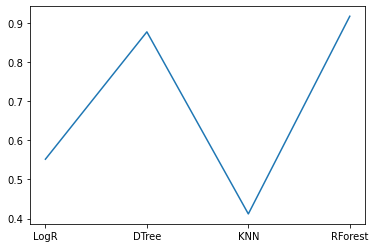

In [38]:
kappa_overview = [kappa_lr, kappa_dt, kappa_knn, kappa_rf] #kappa_svm, kappa_svm2, kappa_svm3, 
kappa_overview = pd.Series(kappa_overview)

exploration_methods = ['LogR', 'DTree', 'KNN', 'RForest'] #'SVM-linear', 'SVM-poly', 'SVM-rbf', 
plt.xticks(np.arange(4), exploration_methods, rotation='45')
kappa_overview.plot()

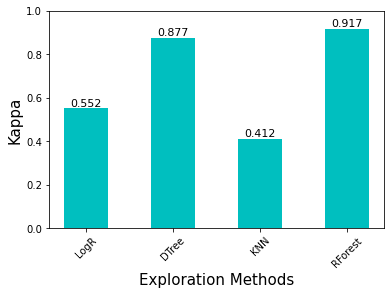

In [43]:
plt.bar(x=exploration_methods, height = kappa_overview, color = 'c', width = 0.5)
#plt.grid()
#plt.title('Efficiency of Machine Learning in Prediction of Wine Types by Chemical Measures')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('Kappa', fontsize=15)
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i in range(len(kappa_overview)):
  plt.text(
      x = i, 
      y = kappa_overview[i], 
      s = round(kappa_overview[i], 3), 
      horizontalalignment='center',
      verticalalignment='bottom',
      size = 11)

plt.show()